## Practical Work 1

For this practical work, the trainees will develop a Python program that is able to implement the gradient descent in order to achieve the linear regression (Single and Multivariables) of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Read RegData csv file into numpy array 

In [2]:
data = np.genfromtxt('RegData.csv',delimiter=',')

In [3]:
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Define variables X and y. 
#### Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [7]:
X, y = data[:, 0], data[:, 1]

#### Explore your data

In [5]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [8]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

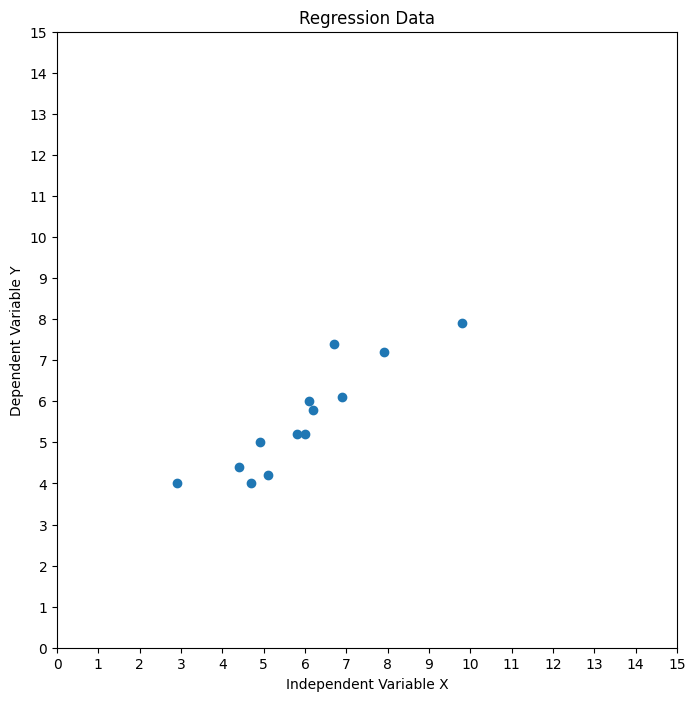

In [13]:
plt.figure(figsize=(8, 8), num= 1)
plt.scatter(X, y)
plt.xlabel('Independent Variable X')
plt.ylabel('Dependent Variable Y')
plt.title('Regression Data')
plt.xticks(np.arange(0,16))
plt.yticks(np.arange(0,16))
plt.show()

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.

In [15]:
theta_0, theta_1 = 0, 0
alpha = 0.001

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
#### Note: you will need to iterate through all data points

In [17]:
h_x = theta_0 + theta_1 * X    # Predict the target variable
print('Taret Variable h(x):', h_x)

Taret Variable h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Step3: Calculate the MSE Cost function 𝑱(theta_0,theta_1 ).
<b>Note:</b> You better use either dot product or norm square of the error vector.

In [20]:
error =  h_x - y
mse = np.sum(error**2) / (2*len(y))

print('Error Vector:\n', error)
print('\nJ:\n', mse)

Error Vector:
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

J:
 16.305384479692318


### Step4: Calculate the gradient components for theta_0 and theta_1.
<b>Note:</b> You can use the error vector calculated in the previous step.

In [22]:
theta_0_gradient = np.sum(error) / len(y)
theta_1_gradient = np.sum(error * X) / len(y)

print('d_theta_0: ', theta_0_gradient)
print('d_theta_1: ', theta_1_gradient)

d_theta_0:  -5.56923073976923
d_theta_1:  -35.043846043215375


### Step5: Update the parameters (simultaneously).

In [24]:
theta_0_new = theta_0 - (alpha * theta_0_gradient)
theta_1_new = theta_1 - (alpha * theta_1_gradient)

print('theta_0_new: ', theta_0_new)
print('theta_1_new: ', theta_1_new)

theta_0_new:  0.00556923073976923
theta_1_new:  0.03504384604321537


### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
#### The objective from this step is to combine all the previous steps and iterate untill you either achieve the maximum number of iterations or reach the minimum.

In [85]:
def predict_without_condition(x: np.array, y: np.array, alpha: float, max_iterations: int) -> tuple:
    '''
    A Function to apply linear regression on data. The data given is in the form of 1 feature (x) -> maps to 1 predicted value (y). (Univariant)

    Args:
        x (np.array): Input feature.
        y (np.array): Target value.
        alpha (float): Learning rate.
        max_iterations (int): Maximum number of iterations for gradient descent.

    Returns:
        theta_0, theta_1 (tuple): Final values of theta_0 and theta_1 (model parameters).
    '''

    # Check the input parameters
    assert len(x) == len(y), "x and y must have the same length."
    assert alpha > 0, "alpha must be a positive float."
    assert max_iterations > 0, "max_iterations must be a positive integer."

    theta_0, theta_1 = 0, 0
    x = x.reshape(1, len(y))     # Reshape the x array
    y = y.reshape(1, len(y))     # Reshape the y array

    y_predict = np.zeros(shape=y.shape)     # Initialize the predicted vector


    # Training Loop
    for iteration in range(max_iterations):
        
        print(f"\n****************** Iteration {iteration} ********************")

        # Get the predicted value by substituting in the linear equation (Predict values)
        y_predict = theta_0 + theta_1 * x
        print('\nPredicted Variable h(x):', y_predict)

        # Get the error
        error = y_predict - y
        cost = np.sum(error ** 2) / (2 * y.size)
        print('\nError Vector:\n', error)
        print('\nCost Function (J):\n', cost)

        # Get the gradient components
        theta_0_gradient = np.sum(error) / y.size
        theta_1_gradient = np.sum(error * x) / y.size

        # Get the gradient vector & its norm
        gradient = np.array([[theta_0_gradient], [theta_1_gradient]])
        print('\nGradient Vector:\n', gradient)
        print('\nGradient Vector Norm: ', np.linalg.norm(gradient))

        # Update parameters
        theta_0 -= alpha * theta_0_gradient
        theta_1 -= alpha * theta_1_gradient

        print('\ntheta_0_new: ', theta_0)
        print('theta_1_new: ', theta_1)



    # Get the training report
    print("\n****************** Training Report ********************")

    print(f"\nGradient Descent converged after {iteration} iterations")
    print('theta_0_Opt: ', theta_0)
    print('theta_1_Opt: ', theta_1)

    y_predict = theta_0 + theta_1 * x
    print('\nError Vector:\n', (y_predict - y))
    print('\nCost:', np.sum((y_predict - y)**2) / (2 * y.size))
    print('\nh(x) = y_predict:\n', y_predict)
    print('\ny_actual:\n', y)

    return theta_0, theta_1

In [90]:
def predict_with_condition(x: np.array, y: np.array, alpha: float, max_iterations: int) -> tuple:
    '''
    A Function to apply linear regression on data. The data given is in the form of 1 feature (x) -> maps to 1 predicted value (y).
    It iterates for max_iterations to find the best fit line, and stops before that number if we reached the minimum (we don't see a noticeable improve in the cost).

    Args:
        x (np.array): Input feature.
        y (np.array): Target value.
        alpha (float): Learning rate.
        max_iterations (int): Maximum number of iterations for gradient descent.

    Returns:
        theta_0, theta_1 (tuple): Final values of theta_0 and theta_1 (model parameters).
    '''

     # Check the input parameters
    assert len(x) == len(y), "x and y must have the same length."
    assert alpha > 0, "alpha must be a positive float."
    assert max_iterations > 0, "max_iterations must be a positive integer."

    theta_0, theta_1 = 0, 0
    x = x.reshape(1, len(y))     # Reshape the x array
    y = y.reshape(1, len(y))     # Reshape the y array

    y_predict = np.zeros(shape=y.shape)     # Initialize the predicted vector


    # Training Loop
    for iteration in range(max_iterations):
        
        print(f"\n****************** Iteration {iteration} ********************")

        # Get the predicted value by substituting in the linear equation (Predict values)
        y_predict = theta_0 + theta_1 * x
        print('\nPredicted Variable h(x):', y_predict)

        # Get the error
        error = y_predict - y
        cost = np.sum(error ** 2) / (2 * y.size)
        print('\nError Vector:\n', error)
        print('\nCost Function (J):\n', cost)

        # Get the gradient components
        theta_0_gradient = np.sum(error) / y.size
        theta_1_gradient = np.sum(error * x) / y.size

        # Get the gradient vector & its norm
        gradient = np.array([[theta_0_gradient], [theta_1_gradient]])
        print('\nGradient Vector:\n', gradient)
        print('\nGradient Vector Norm: ', np.linalg.norm(gradient))


        # Update parameters
        theta_0 -= alpha * theta_0_gradient
        theta_1 -= alpha * theta_1_gradient

        print('\ntheta_0_new: ', theta_0)
        print('theta_1_new: ', theta_1)


        # If the cost doesn't get improved noticeably then exit the training
        new_cost = np.sum(((theta_0 + theta_1 * x) - y) ** 2) / (2 * y.size) 
        if (cost - new_cost) <= 0.0001:
            break



    # Get the training report
    print("\n****************** Training Report ********************")

    print(f"\nGradient Descent converged after {iteration+1} iterations")
    print('theta_0_Opt: ', theta_0)
    print('theta_1_Opt: ', theta_1)

    y_predict = theta_0 + theta_1 * x
    print('\nError Vector:\n', (y_predict - y))
    print('\nCost:', np.sum((y_predict - y)**2) / (2 * y.size))
    print('\nh(x) = y_predict:\n', y_predict)
    print('\ny_actual:\n', y)

    return theta_0, theta_1

In [86]:
theta_0, theta_1 = predict_without_condition(x=X, y=y, alpha=0.01, max_iterations=1000)


****************** Iteration 0 ********************

Predicted Variable h(x): [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Error Vector:
 [[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
  -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
  -5.19999981]]

Cost Function (J):
 16.305384479692318

Gradient Vector:
 [[ -5.56923074]
 [-35.04384604]]

Gradient Vector Norm:  35.483622652335995

theta_0_new:  0.0556923073976923
theta_1_new:  0.35043846043215376

****************** Iteration 1 ********************

Predicted Variable h(x): [[1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
  2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
  2.08823544]]

Error Vector:
 [[-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
  -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
  -3.11176436]]

Cost Function (J):
 6.175608808043304

Gradient Vector:
 [[ -3.42708175]
 [-21.3384526

In [91]:
theta_0, theta_1 = predict_with_condition(x=X, y=y, alpha=0.01, max_iterations=1000)


****************** Iteration 0 ********************

Predicted Variable h(x): [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Error Vector:
 [[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
  -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
  -5.19999981]]

Cost Function (J):
 16.305384479692318

Gradient Vector:
 [[ -5.56923074]
 [-35.04384604]]

Gradient Vector Norm:  35.483622652335995

theta_0_new:  0.0556923073976923
theta_1_new:  0.35043846043215376

****************** Iteration 1 ********************

Predicted Variable h(x): [[1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
  2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
  2.08823544]]

Error Vector:
 [[-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
  -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
  -3.11176436]]

Cost Function (J):
 6.175608808043304

Gradient Vector:
 [[ -3.42708175]
 [-21.3384526

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [92]:
h_x = theta_0 + theta_1 * X
print("h(x) = y_predict:\n", h_x)
print("\ny_actual:\n", y)

h(x) = y_predict:
 [2.74650524 6.14424783 4.53479095 7.21721952 8.91609103 6.32307666
 5.60776221 5.69717641 5.51834801 4.71361935 4.35596212 4.08771952
 5.3395196 ]

y_actual:
 [4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

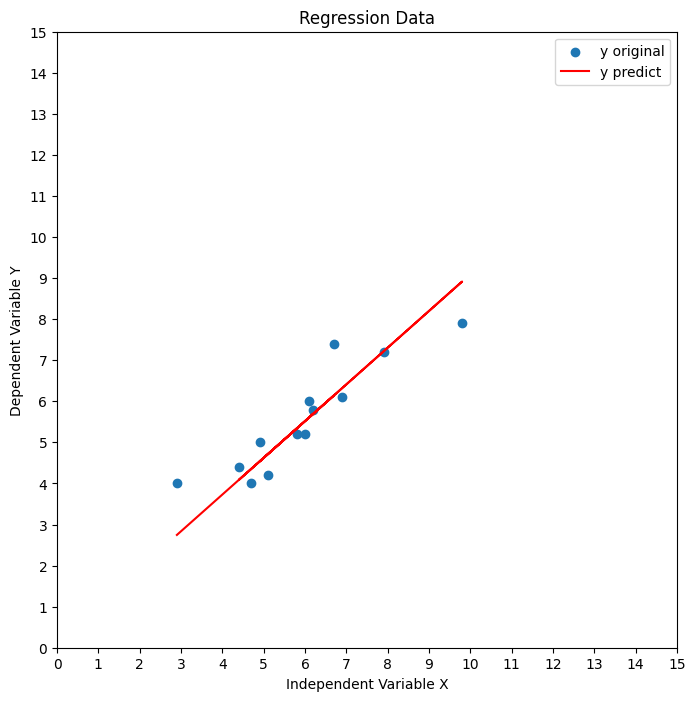

In [95]:
plt.figure(figsize=(8, 8), num= 1)
plt.scatter(X, y, label='y original')
plt.plot(X, h_x, color='r', label='y predict')
plt.xlabel('Independent Variable X')
plt.ylabel('Dependent Variable Y')
plt.title('Regression Data')
plt.xticks(np.arange(0,16))
plt.yticks(np.arange(0,16))
plt.legend()
plt.show()

#### Use R2 score to evaluate LR equation output
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [96]:
from sklearn.metrics import r2_score

r2_score(y, h_x)         # Get the r2 score (by how much can the linear relationship we chose describe y)

0.7481460845657725

## Plot loss function
### Repeat your implementaion version and save loss for each iteration (epoch)

In [103]:
def predict_with_loss(x: np.array, y: np.array, alpha: float, max_iterations: int) -> tuple:
    '''
    A Function to apply linear regression on data. The data given is in the form of 1 feature (x) -> maps to 1 predicted value (y). (univariant)
    It iterates for max_iterations to find the best fit line, and stops before that number if we reached the minimum (we don't see a noticeable improve in the cost).

    Args:
        x (np.array): Input feature.
        y (np.array): Target value.
        alpha (float): Learning rate.
        max_iterations (int): Maximum number of iterations for gradient descent.

    Returns:
        theta_0, theta_1 (tuple): Final values of theta_0 and theta_1 (model parameters).
    '''

     # Check the input parameters
    assert len(x) == len(y), "x and y must have the same length."
    assert alpha > 0, "alpha must be a positive float."
    assert max_iterations > 0, "max_iterations must be a positive integer."

    theta_0, theta_1 = 0, 0
    x = x.reshape(1, len(y))     # Reshape the x array
    y = y.reshape(1, len(y))     # Reshape the y array

    y_predict = np.zeros(shape=y.shape)     # Initialize the predicted vector
    training_loss = []          # List to store the training loss


    # Training Loop
    for iteration in range(max_iterations):
        
        print(f"\n****************** Iteration {iteration} ********************")

        # Get the predicted value by substituting in the linear equation (Predict values)
        y_predict = theta_0 + theta_1 * x
        print('\nPredicted Variable h(x):', y_predict)


        # Get the error
        error = y_predict - y
        cost = np.sum(error ** 2) / (2 * y.size)
        training_loss.append(cost)          # append the loss
        print('\nError Vector:\n', error)
        print('\nCost Function (J):\n', cost)


        # Get the gradient components
        theta_0_gradient = np.sum(error) / y.size
        theta_1_gradient = np.sum(error * x) / y.size


        # Get the gradient vector & its norm
        gradient = np.array([[theta_0_gradient], [theta_1_gradient]])
        print('\nGradient Vector:\n', gradient)
        print('\nGradient Vector Norm: ', np.linalg.norm(gradient))


        # Update parameters
        theta_0 -= alpha * theta_0_gradient
        theta_1 -= alpha * theta_1_gradient
        print('\ntheta_0_new: ', theta_0)
        print('theta_1_new: ', theta_1)
        

        # If the cost doesn't get improved noticeably then exit the training
        new_cost = np.sum(((theta_0 + theta_1 * x) - y) ** 2) / (2 * y.size) 
        if (cost - new_cost) <= 0.0001:
            break

    # append the loss for the last parameters
    cost = np.sum(((theta_0 + theta_1 * x) - y) ** 2) / (2 * y.size) 
    training_loss.append(cost)         


    # Get the training report
    print("\n****************** Training Report ********************")

    print(f"\nGradient Descent converged after {iteration+1} iterations")
    print('theta_0_Opt: ', theta_0)
    print('theta_1_Opt: ', theta_1)

    y_predict = theta_0 + theta_1 * x
    print('\nError Vector:\n', (y_predict - y))
    print('\nCost:', np.sum((y_predict - y)**2) / (2 * y.size))
    print('\nh(x) = y_predict:\n', y_predict)
    print('\ny_actual:\n', y)
    

    return theta_0, theta_1, training_loss

In [105]:
theta_0, theta_1, training_loss = predict_with_loss(x=X, y=y, alpha=0.01, max_iterations=1000)


****************** Iteration 0 ********************

Predicted Variable h(x): [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Error Vector:
 [[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
  -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
  -5.19999981]]

Cost Function (J):
 16.305384479692318

Gradient Vector:
 [[ -5.56923074]
 [-35.04384604]]

Gradient Vector Norm:  35.483622652335995

theta_0_new:  0.0556923073976923
theta_1_new:  0.35043846043215376

****************** Iteration 1 ********************

Predicted Variable h(x): [[1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
  2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
  2.08823544]]

Error Vector:
 [[-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
  -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
  -3.11176436]]

Cost Function (J):
 6.175608808043304

Gradient Vector:
 [[ -3.42708175]
 [-21.3384526

### Plot loss vs. iterations

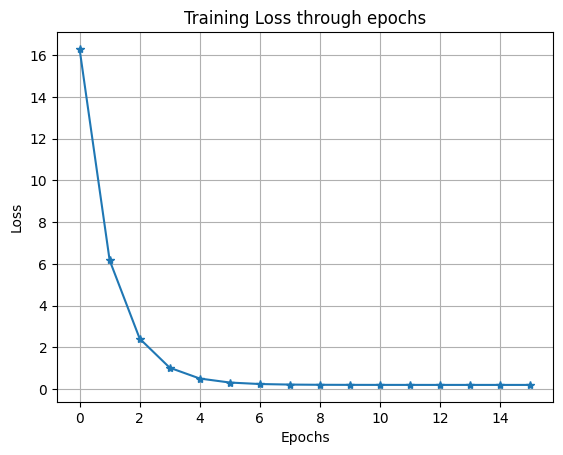

In [109]:
# Plot the iteration number vs. the cost
plt.plot(range(len(training_loss)), training_loss, marker='*')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss through epochs')
plt.grid(visible=True)
plt.show()

## Multivariate LR

#### Read MultiVarLR csv file into numpy array.
#### The first three columns are x1,x2, and x3.
#### The last column is the target label y.

In [110]:
data2 = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [111]:
data2

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [123]:
#X1, X2, X3 = data2[: ,0], data2[: ,1], data2[: ,2]
X2 = data2[: ,0:-1]
y2 = data2[: ,-1]

In [124]:
X2

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [125]:
y2

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

### Generalize your implementation to work for MultiVariables
#### Vectorize your implementation.
<b>Notes:</b> 
- You need to add column that contains ones to the data. This column represent x feature for theta_0.
- Use learninig rate = 0.0001.

In [174]:
def predict_multivariant_with_loss(x: np.array, y: np.array, alpha: float, max_iterations: int) -> tuple:
    '''
    A Function to apply linear regression on data. The data given is in the form of N features (x) -> maps to 1 predicted value (y).
    It iterates for max_iterations to find the best fit line, and stops before that number if we reached the minimum (we don't see a noticeable improve in the cost).

    Args:
        x (np.array): Input feature.
        y (np.array): Target value.
        alpha (float): Learning rate.
        max_iterations (int): Maximum number of iterations for gradient descent.

    Returns:
        thetas, training loss (tuple): Final values of theta_0 and theta_1 (model parameters) along with the loss for each iteration.
    '''

     # Check the input parameters
    assert x.shape[0] == len(y), "x and y must have the same length."
    assert alpha > 0, "alpha must be a positive float."
    assert max_iterations > 0, "max_iterations must be a positive integer."

    y = y.reshape(len(y), 1)     # Reshape the y array
    ones = np.ones(shape=(x.shape[0], 1))
    x = np.concatenate([ones, x], axis=1)       # Reshape the x array for vectorization

    thetas = np.zeros(shape=(x.shape[1], 1))     # Initialize the model parameters
    y_predict = np.zeros(shape=y.shape)     # Initialize the predicted vector
    training_loss = []          # List to store the training loss


    # Training Loop
    for iteration in range(max_iterations):
        
        print(f"\n****************** Iteration {iteration} ********************")

        # Get the predicted value by substituting in the linear equation (Predict values)
        y_predict = x @ thetas                    # (m * (n+1))  @ ((n+1) * 1)  = (m * 1)
        print('\nPredicted Variable h(x):', y_predict)


        # Get the error
        error = y_predict - y       # Will have shape (m * 1), where m is the number of observations
        cost = np.sum(error ** 2) / (2 * y.size)        # Scalar value
        training_loss.append(cost)          # append the loss
        print('\nError Vector:\n', error)
        print('\nCost Function (J):\n', cost)


        # Get the gradient vector (gradient components) & its norm 
        gradient = x.T @ error / y.size   # Will have shape ((n+1) * 1), where n is the number of features
        print('\nGradient Vector:\n', gradient)
        print('\nGradient Vector Norm: ', np.linalg.norm(gradient))


        # Update parameters
        thetas -= alpha * gradient                # Will have shape ((n+1) * 1), where n is the number of features      
        print('\nthetas_new:\n', thetas)
        

        # If the cost doesn't get improved noticeably then exit the training
        new_cost = np.sum(((x @ thetas) - y) ** 2) / (2 * y.size) 
        if (cost - new_cost) <= 0.0001:
            break

    # append the loss for the last parameters
    cost = np.sum(((x @ thetas) - y) ** 2) / (2 * y.size) 
    training_loss.append(cost)         


    # Get the training report
    print("\n****************** Training Report ********************")

    print(f"\nGradient Descent converged after {iteration+1} iterations")
    print('thetas_Opt:\n', thetas)

    y_predict =  x @ thetas   
    print('\nError Vector:\n', (y_predict - y))
    print('\nCost:', np.sum((y_predict - y)**2) / (2 * y.size))
    print('\nh(x) = y_predict:\n', y_predict)
    print('\ny_actual:\n', y)
    

    return thetas, training_loss

In [175]:
thetas, training_loss = predict_multivariant_with_loss(X2, y2, alpha=0.0001, max_iterations=1000)


****************** Iteration 0 ********************

Predicted Variable h(x): [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Error Vector:
 [[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]

Cost Function (J):
 13405.98

Gradient Vector:
 [[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]

Gradient Vector Norm:  22917.5459892197

thetas_new:
 [[0.016204]
 [1.30758 ]
 [1.31472 ]
 [1.346708]]

****************** Iteration 1 ********************

Predicted Variable h(x): [[301.650244]
 [362.560348]
 [357.234064]
 [389.057244]
 [276.510624]
 [203.864004]
 [291.22502 ]
 [215.899264]
 [338.842264]
 [313.855728]
 [280.579308]
 [276.659996]
 [369.069972]
 [306.802308]
 [292.564588]
 [367.915192]
 [292.187588]
 [349

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [176]:
h_x = np.concatenate([np.ones(shape=(X2.shape[0], 1)), X2], axis=1) @ thetas   
print('\nh(x) = y_predict:\n', h_x)


h(x) = y_predict:
 [[152.87121322]
 [184.85674383]
 [181.47483649]
 [198.75052368]
 [140.34382743]
 [105.31205204]
 [150.10779197]
 [113.11610301]
 [174.37742357]
 [164.06972743]
 [143.81388672]
 [142.72273052]
 [186.36979543]
 [153.41203893]
 [151.08774876]
 [188.54161627]
 [145.10262039]
 [180.58785665]
 [177.3277855 ]
 [158.74612896]
 [175.79168644]
 [174.43302327]
 [167.19171348]
 [151.52786662]
 [190.88314212]]


### Plot loss vs. iterations

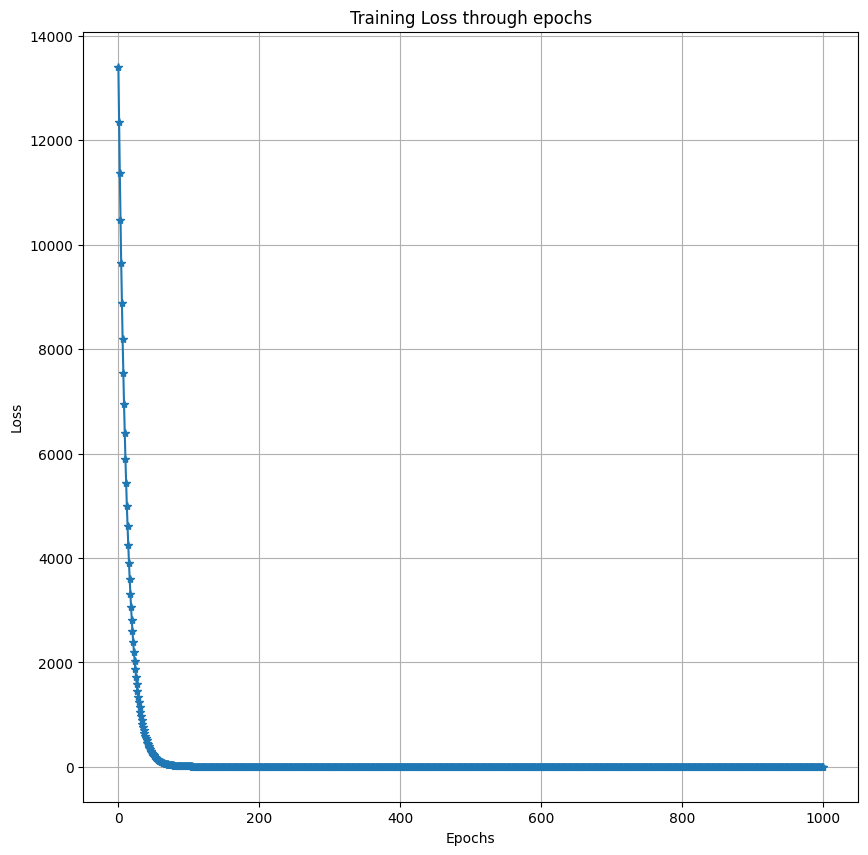

In [178]:
# Plot the iteration number vs. the cost
plt.figure(figsize=(10,10))
plt.plot(range(len(training_loss)), training_loss, marker='*')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss through epochs')
plt.grid(visible=True)
plt.show()

#### Use R2 score to evaluate LR equation output

In [179]:
r2_score(y2, h_x)

0.9886850607889688